In [ ]:
win_len = 500
win_shift = int(win_len / 4)

!python process.py --audio_dir custom_sound \
    --output_path output_sound \
    --time_clip 1 \
    --target_fs_values 16000 \
    --clipping_thresholds 0.1 \
    --dynamic 0 \
    --saving 0 \
    --plotting 0 \
    --delta 0 \
    --win_len {win_len} \
    --win_shift {win_shift}

Directory already exists: output_sound/fs_16000_threshold_0.10
Loading audio: 237-134500-0011.wav
Generating clipped signal 

Clipping threshold 0.100, true SDR: 3.39 dB, Clipped samples: 26.64%, Time: 1sec
Processing:   0%|                                | 0/131 [00:00<?, ?iteration/s]/data/AAG/MTech_Project_First_Part/spade_segmentation.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  data_rec_fin[idx] = data_rec_fin[idx] + data_rec_block * gsyn
Processing: 100%|██████████████████████| 131/131 [00:05<00:00, 23.64iteration/s]
Created directory: output_sound/fs_16000_threshold_0.10/audios
Results saved to output_sound/fs_16000_threshold_0.10/results_1s.xlsx


In [ ]:
# nohup python run_in_bg.py > output_log.txt 2>&1 &
# find /data2/AAG/MTech_Project_Second_Part/speech_data -type f -name "*.wav" | shuf -n 100 | xargs -I {} cp {} /data2/AAG/MTech_Project_First_Part/custom_sound/

# Variation study

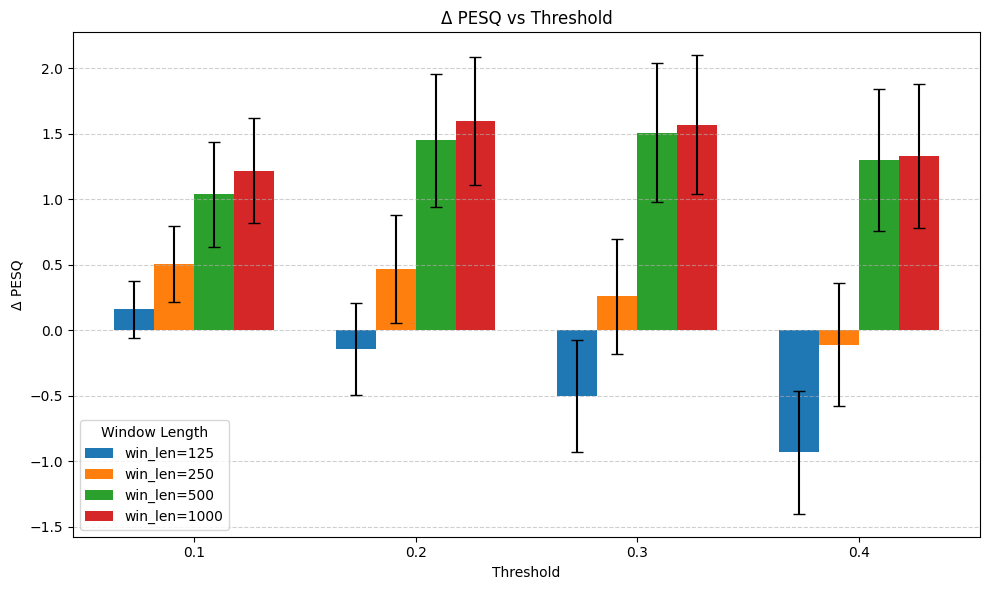

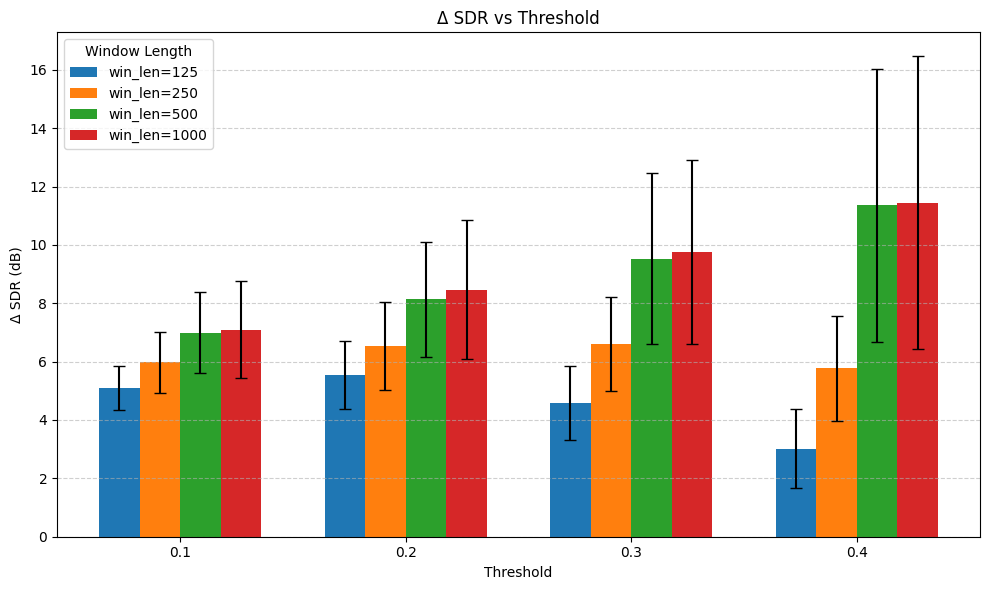

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from Excel
df = pd.read_excel('variation_study_summary.xlsx')

# Convert win_len to string for legend clarity
df['win_len'] = df['win_len'].astype(str)

# Unique values for plotting
thresholds = sorted(df['threshold'].unique())
win_lens = sorted(df['win_len'].unique(), key=lambda x: int(x))
bar_width = 0.18
x = np.arange(len(thresholds))

# Plot 1: PESQ Bar Plot
plt.figure(figsize=(10, 6))
for i, win_len in enumerate(win_lens):
    values = df[df['win_len'] == win_len].set_index('threshold').reindex(thresholds)
    offset = (i - len(win_lens)/2) * bar_width + bar_width/2
    plt.bar(x + offset, values['pesq_mean'], width=bar_width,
            yerr=values['pesq_std'], capsize=4, label=f'win_len={win_len}')

plt.xticks(x, thresholds)
plt.xlabel('Threshold')
plt.ylabel('Δ PESQ')
plt.title('Δ PESQ vs Threshold')
plt.legend(title='Window Length')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: SDR Bar Plot
plt.figure(figsize=(10, 6))
for i, win_len in enumerate(win_lens):
    values = df[df['win_len'] == win_len].set_index('threshold').reindex(thresholds)
    offset = (i - len(win_lens)/2) * bar_width + bar_width/2
    plt.bar(x + offset, values['sdr_mean'], width=bar_width,
            yerr=values['sdr_std'], capsize=4, label=f'win_len={win_len}')

plt.xticks(x, thresholds)
plt.xlabel('Threshold')
plt.ylabel('Δ SDR (dB)')
plt.title('Δ SDR vs Threshold')
plt.legend(title='Window Length')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()